In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
import nltk
import os
custom_download_path = '/kaggle/working/nltk_data'
os.makedirs(custom_download_path, exist_ok=True)

nltk.data.path.append(custom_download_path)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
os.chdir(r"C:\Users\cheta\Downloads\CodSoft\Genre Classification Dataset")

In [6]:
train_data = pd.read_csv("train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [7]:
print("shape",train_data.shape)
train_data.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (54200, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [9]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
df.shape
df.drop_duplicates(inplace = True) 
df.dropna( inplace = True )



In [11]:
df.shape

(108414, 4)

In [12]:
stopword = set(stopwords.words('english'))

def preprocessing(text):

    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = re.sub(r'[#@\$]', '', text)

    tokens = word_tokenize(text)
    
    lemmatizer  = WordNetLemmatizer()
 
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 
   

In [13]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [14]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

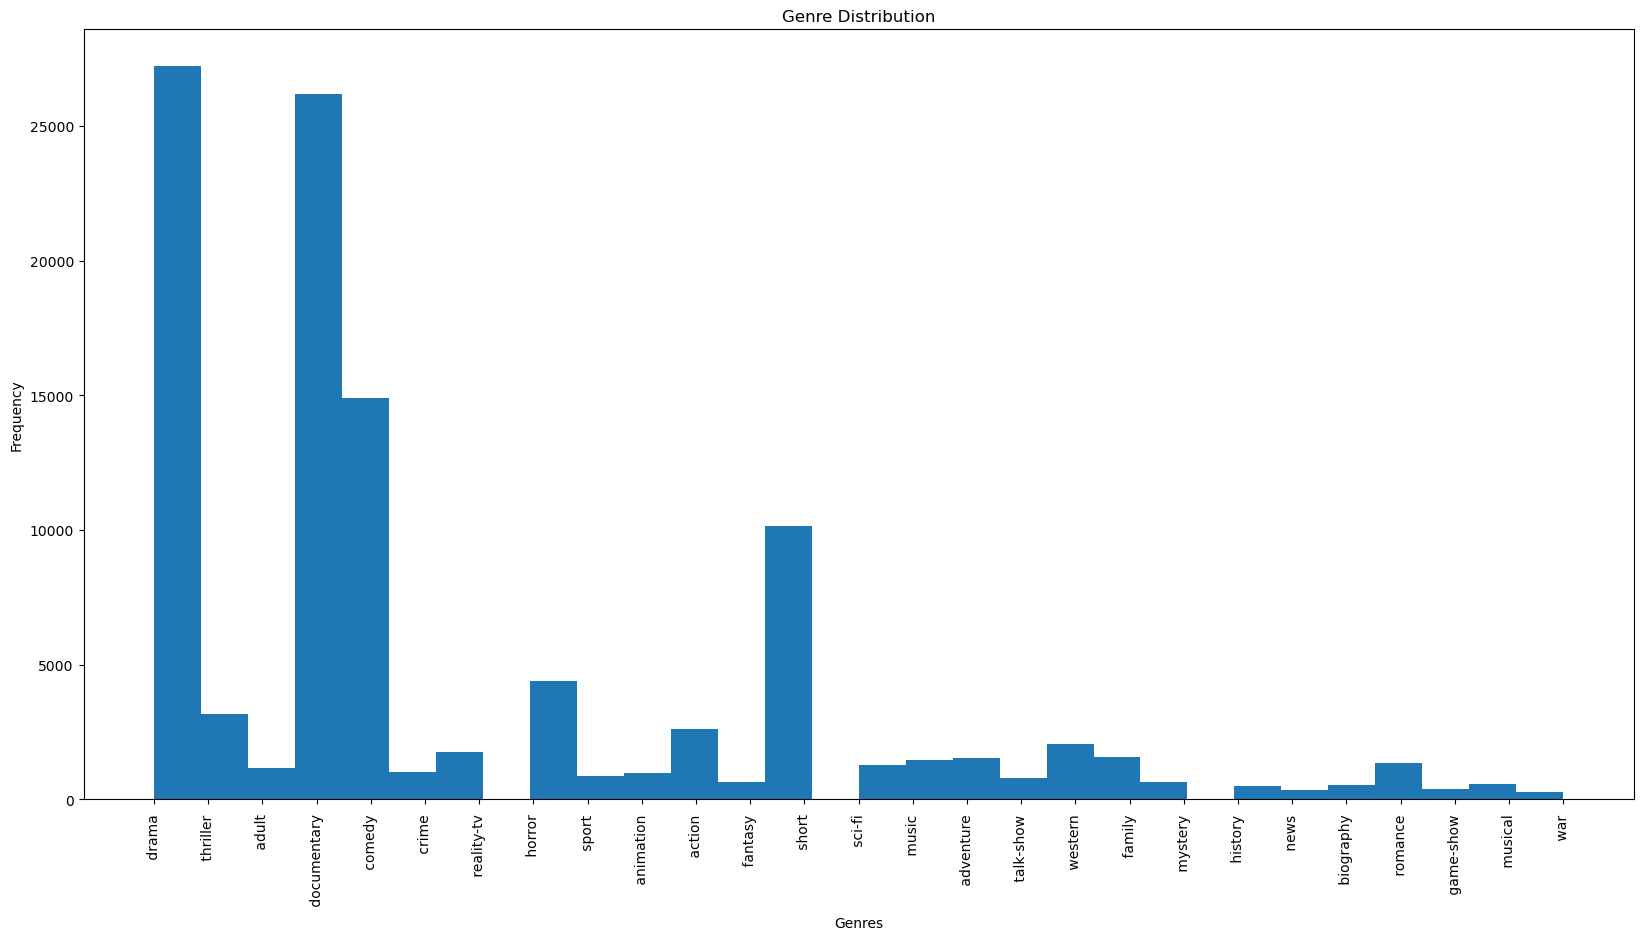

In [15]:

plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =30)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [16]:
data = df.drop(["Title","id"] , axis = 1) 
data.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [17]:
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names   

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [19]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [22]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.9995572527533344
Model Score on Training data 0.5204862840592543
               precision    recall  f1-score   support

      action        0.30      0.31      0.31      1241
       adult        0.39      0.50      0.44       458
   adventure        0.23      0.31      0.27       563
   animation        0.16      0.25      0.19       306
   biography        0.02      0.05      0.03       126
      comedy        0.52      0.50      0.51      7753
       crime        0.08      0.11      0.09       345
 documentary        0.73      0.70      0.71     13599
       drama        0.60      0.54      0.57     15213
      family        0.18      0.25      0.21       555
     fantasy        0.10      0.17      0.13       187
   game-show        0.58      0.68      0.63       171
     history        0.02      0.03      0.02       117
      horror        0.55      0.54      0.55      2234
       music        0.49      0.55      0.52       632
     musical        0.1

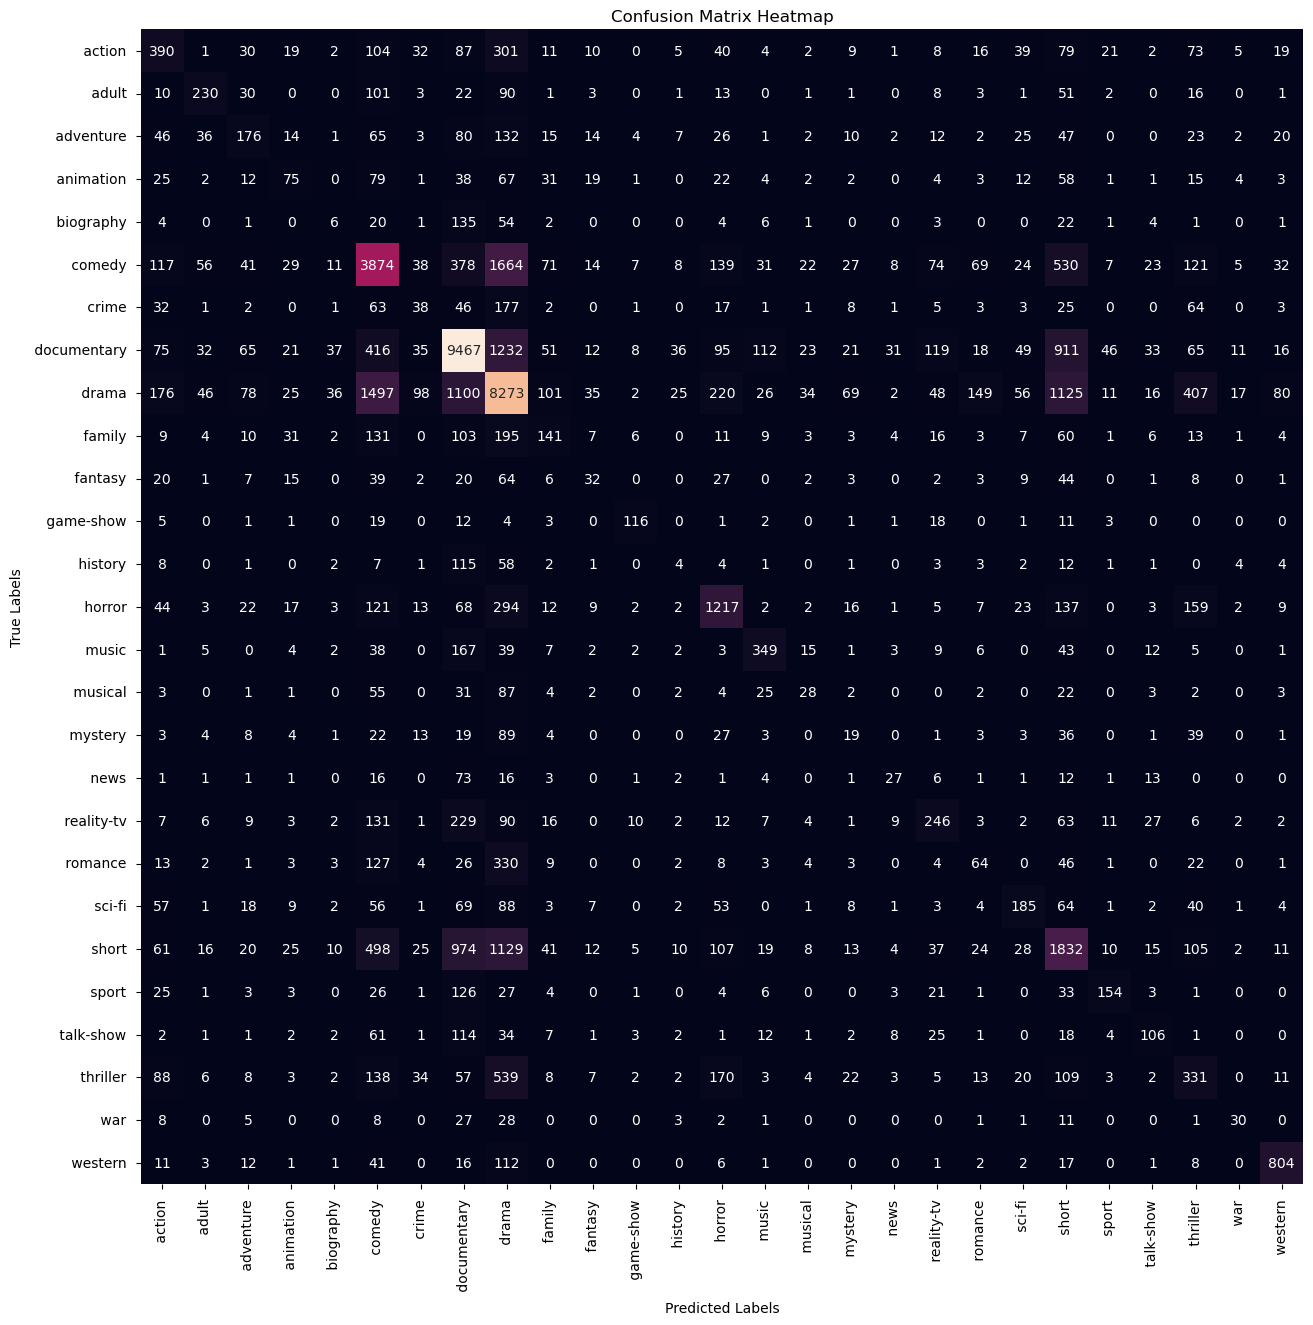

In [23]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Training data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15)) 
sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)  
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()